In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [7]:
data = pd.read_csv('sales_data.csv')
data.head()

,ProductID,SaleDate,QuantitySold,SaleAmount
0,13,2023-02-14,6,461.670654
1,16,2023-01-25,24,1273.768063
2,1,2023-07-08,44,3121.243033
3,4,2023-05-12,33,2132.923832
4,4,2023-04-10,12,891.872691


In [6]:
data.describe()

,ProductID,QuantitySold,SaleAmount
count,100.000000,100.000000,100.000000
mean,9.290000,26.400000,1453.436409
std,5.724826,14.164973,1084.237561
min,1.000000,1.000000,31.346892
25%,4.000000,12.750000,675.526415
50%,9.000000,28.000000,1161.162861
75%,15.000000,38.500000,1996.705106
max,19.000000,49.000000,4735.339445


In [8]:
# Data cleaning
# Assuming 'SaleDate' is in string format
data['SaleDate'] = pd.to_datetime(data['SaleDate'])
data

,ProductID,SaleDate,QuantitySold,SaleAmount
0,13,2023-02-14,6,461.670654
1,16,2023-01-25,24,1273.768063
2,1,2023-07-08,44,3121.243033
3,4,2023-05-12,33,2132.923832
4,4,2023-04-10,12,891.872691
...,...,...,...,...
95,17,2023-09-18,20,940.470345
96,8,2023-08-24,42,1778.045956
97,10,2023-07-25,30,1378.647058
98,1,2023-10-20,47,1746.744605


In [10]:
# Data analysis
total_sales_per_product = data.groupby('ProductID')['QuantitySold'].sum()
top_selling_products = total_sales_per_product.sort_values(ascending=False).head(10)
top_selling_products

ProductID
1     320
4     225
16    192
5     174
10    171
8     168
7     163
11    147
19    139
18    126
Name: QuantitySold, dtype: int64

In [14]:
# Weekly trend analysis
data['DayOfWeek'] = data['SaleDate'].dt.day_name()
data

,ProductID,SaleDate,QuantitySold,SaleAmount,DayOfWeek
0,13,2023-02-14,6,461.670654,Tuesday
1,16,2023-01-25,24,1273.768063,Wednesday
2,1,2023-07-08,44,3121.243033,Saturday
3,4,2023-05-12,33,2132.923832,Friday
4,4,2023-04-10,12,891.872691,Monday
...,...,...,...,...,...
95,17,2023-09-18,20,940.470345,Monday
96,8,2023-08-24,42,1778.045956,Thursday
97,10,2023-07-25,30,1378.647058,Tuesday
98,1,2023-10-20,47,1746.744605,Friday


In [15]:
average_sales_per_day = data.groupby('DayOfWeek')['SaleAmount'].mean()
average_sales_per_day

DayOfWeek
Friday       1780.118022
Monday       1428.220308
Saturday     1467.128720
Sunday       1431.799354
Thursday     1180.347010
Tuesday      1552.030612
Wednesday    1307.694248
Name: SaleAmount, dtype: float64

In [16]:
# Hypothesis Testing
# Example: Comparing sales on Monday vs. Sunday
# ANOVA (Analysis of Variance) test to compare sales on Monday versus Sunday, if there's a statistically significant difference in the average sale amounts between these two days of the week. 
monday_sales = data[data['DayOfWeek'] == 'Monday']['SaleAmount']
sunday_sales = data[data['DayOfWeek'] == 'Sunday']['SaleAmount']
stat, p = f_oneway(monday_sales, sunday_sales)  # F-value, p-value
print('ANOVA test result: Statistic = {}, p-value = {}'.format(stat, p))

ANOVA test result: Statistic = 6.08587893118916e-05, p-value = 0.9938255909132856


F-statistic: This value is very close to zero, indicating that the variance between the groups (Monday and Sunday sales) is not significantly different from the variance within the groups.

p-value: The p-value is much higher than the common significance level of 0.05 (5%). In statistical testing, a p-value below 0.05 typically suggests that the observed differences are statistically significant.  

Conclude that there is no statistically significant difference in the average sale amounts on Mondays versus Sundays in this dataset.

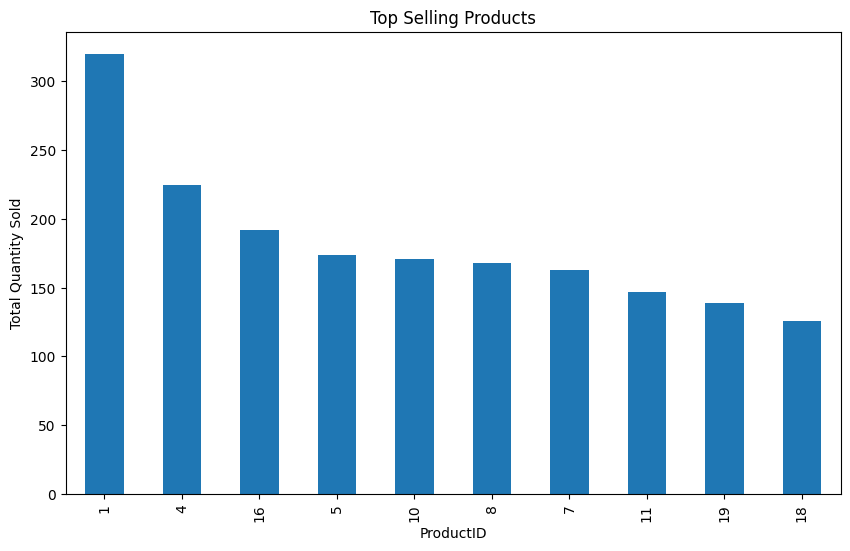

In [17]:
# Data Visualization
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('ProductID')
plt.ylabel('Total Quantity Sold')
plt.show()

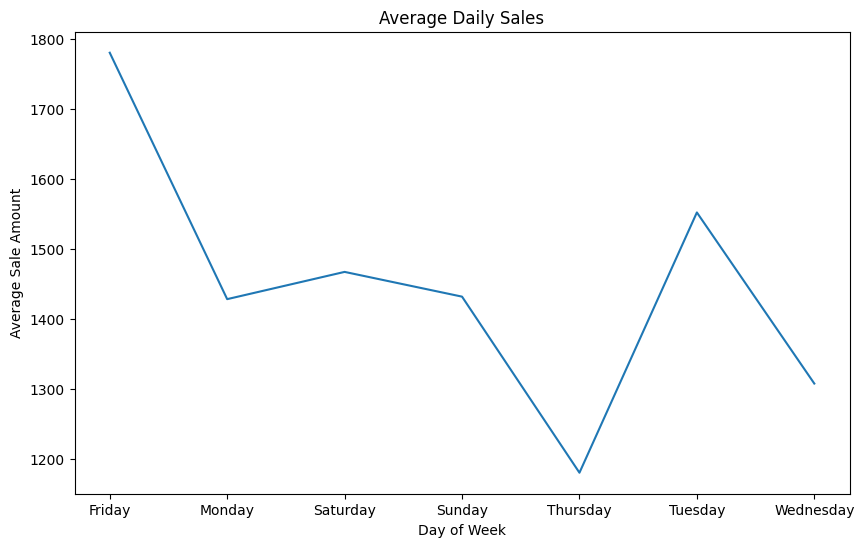

In [18]:
plt.figure(figsize=(10, 6))
average_sales_per_day.plot(kind='line')
plt.title('Average Daily Sales')
plt.xlabel('Day of Week')
plt.ylabel('Average Sale Amount')
plt.show()